In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
import rasterio.plot as rioplt
import cartopy
from cartopy.crs import CRS

In [2]:
src_32 = '../test_agrisat/T32TQM_20210301T100031_B02_10m.jp2'
src_33 = '../test_agrisat/T33TTG_20210430T100021_B02_10m.jp2'

In [4]:
img_32 = rasterio.open(src_32)
img_33 = rasterio.open(src_33)
clip_shape = gpd.read_file('../vectors/cut_poly.shp')

In [5]:
img_32.crs

CRS.from_epsg(32632)

In [6]:
img_33.crs

CRS.from_epsg(32633)

In [7]:
img_32.bounds

BoundingBox(left=699960.0, bottom=4590240.0, right=809760.0, top=4700040.0)

In [8]:
img_33.bounds

BoundingBox(left=199980.0, bottom=4590240.0, right=309780.0, top=4700040.0)

In [9]:
clip_shape.crs

<Derived Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
clip_shape.bounds

,minx,miny,maxx,maxy
0,771515.771014,4.627540e+06,778587.793572,4.633525e+06


In [11]:
# fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12, 9),sharey=True)
# # clip_shape.plot(ax=ax, facecolor="red", edgecolor="red", linewidth=2)
# rioplt.show(img_32, ax=ax1, cmap="Reds")
# rioplt.show(img_33, ax=ax2, cmap="Blues")

<AxesSubplot:>

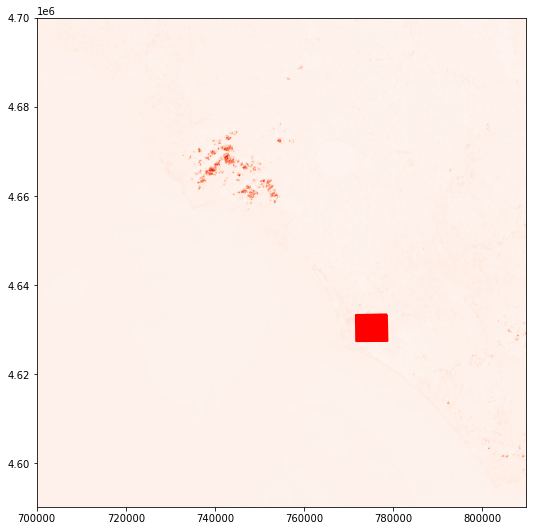

In [12]:
fig,ax = plt.subplots(figsize=(12,9))
rioplt.show(img_32, ax=ax, cmap="Reds")
clip_shape.plot(ax=ax, facecolor="red", edgecolor="red", linewidth=2)

<AxesSubplot:>

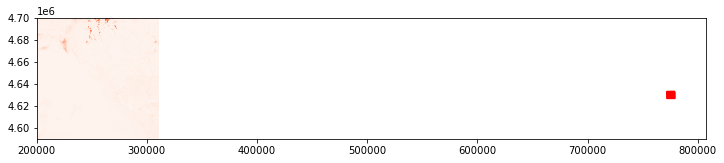

In [13]:
fig,ax = plt.subplots(figsize=(12,9))
rioplt.show(img_33, ax=ax, cmap="Reds")
clip_shape.plot(ax=ax, facecolor="red", edgecolor="red", linewidth=2)

In [14]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:4326'

In [16]:
with rasterio.open(src_32) as src:
    transform, width, height = calculate_default_transform(src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('../test_agrisat/im_32.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

In [17]:
with rasterio.open(src_33) as src:
    transform, width, height = calculate_default_transform(src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('../test_agrisat/im_33.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

In [28]:
cut_poly_4326 = clip_shape.to_crs("EPSG:4326")

<AxesSubplot:>

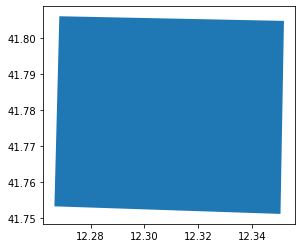

In [29]:
cut_poly_4326.plot()

In [22]:
src_32_wgs84 = '../test_agrisat/im_32.tif'
src_33_wgs84 = '../test_agrisat/im_33.tif'

In [23]:
img_32_wgs84 = rasterio.open(src_32_wgs84)
img_33_wgs84 = rasterio.open(src_33_wgs84)

<AxesSubplot:>

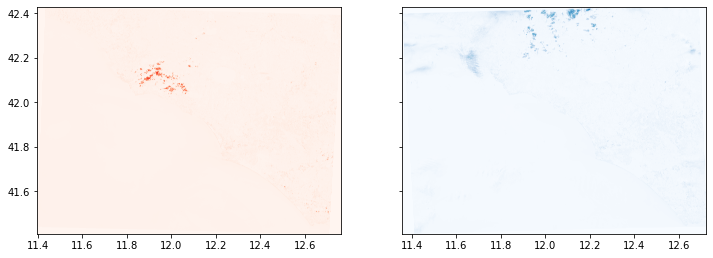

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12, 9),sharey=True)
rioplt.show(img_32_wgs84, ax=ax1, cmap="Reds")
rioplt.show(img_33_wgs84, ax=ax2, cmap="Blues")

<AxesSubplot:>

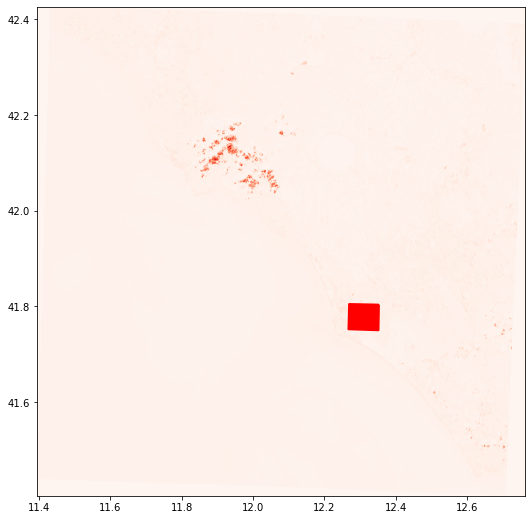

In [31]:
fig,ax = plt.subplots(figsize=(12,9))
rioplt.show(img_32_wgs84, ax=ax, cmap="Reds")
cut_poly_4326.plot(ax=ax, facecolor="red", edgecolor="red", linewidth=2)

<AxesSubplot:>

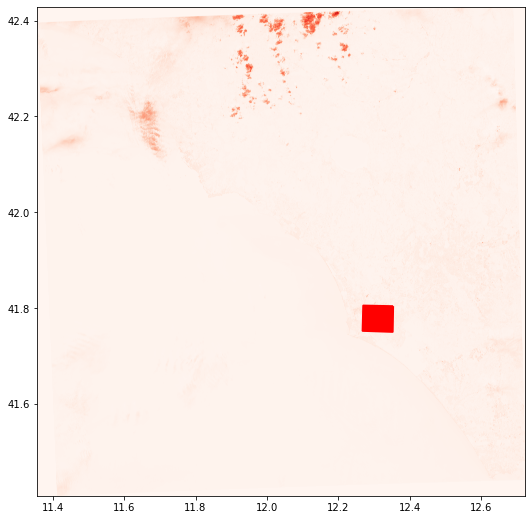

In [32]:
fig,ax = plt.subplots(figsize=(12,9))
rioplt.show(img_33_wgs84, ax=ax, cmap="Reds")
cut_poly_4326.plot(ax=ax, facecolor="red", edgecolor="red", linewidth=2)